# Estudo Dirigido 1

### Aluno: Daniel da Rocha Carneiro

---


In [2]:
# Imports
import matplotlib.pyplot as plt
from PIL import Image



#### Importação das imagens utilizadas

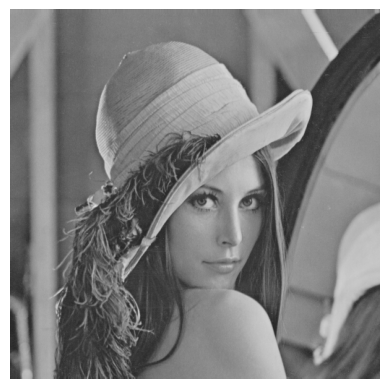

In [3]:
# Load the PGM image
img1 = Image.open('lena.pgm').convert("RGBA")

# Display the image
plt.imshow(img1)
plt.axis('off')
plt.show()
width, height = img1.size

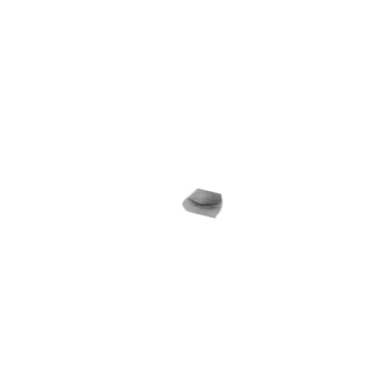

In [4]:
# Load the PGM image
img2 = Image.open('closedEye.png').convert("RGBA")

# Display the image
plt.imshow(img2)
plt.axis('off')
plt.show()

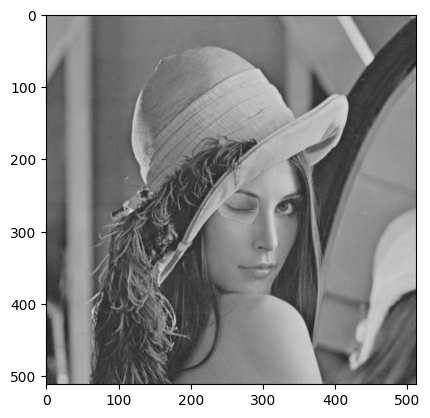

In [5]:
blended_image = img1.copy()
blended_image.paste(img2, (0,0), mask = img2) 
plt.imshow(blended_image)

#### Criação da animação

In [6]:
# Create a list to store the frames
frames = []

num_steps = 30

# Generate intermediate frames
for step in range(num_steps + 1):
    alpha = step / num_steps  # Gradual overlap factor

    blended_image = img1.copy()
    overlay = img2.copy()

    # Iterate through each pixel and change the alpha value
    for x in range(overlay.width):
        for y in range(overlay.height):
            r, g, b, a = overlay.getpixel((x, y))

            # Adjust the alpha value based on the factor
            a = int(a * alpha)

            # Set the modified pixel back to the image
            overlay.putpixel((x, y), (r, g, b, a))

    blended_image.paste(overlay, (0,0), mask = overlay) 
    frames.append(blended_image)
    #plt.imshow(blended_image)
    
frames = frames + frames[::-1]
# Save the frames as a GIF

frames[0].save(
    'animation.gif',
    save_all=True,
    append_images=frames[1:],
    duration=33,  # Adjust the duration between frames in milliseconds
    loop=0  # 0 means the animation will loop indefinitely
)